In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_base = "CNN_hd32_nl6_id2_r0.2_nllloss_bs128_ep100_lr0.001_ndata8000/tl_id1"

output_dir = f"./output/{model_base}"
norm_param = np.loadtxt("./param/norm_params.txt")[1:]

nout = 2

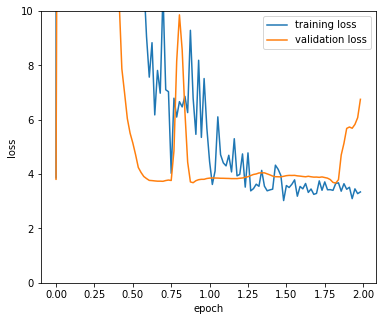

In [20]:
# loss function
fname = f"{output_dir}/log.txt"
data = np.loadtxt(fname)

plt.figure(figsize=(6,5))
plt.ylabel("loss")

plt.xlabel("epoch")
plt.plot(data[:,1], data[:,2], label="training loss")
plt.plot(data[:,1], data[:,3], label="validation loss")
#plt.yscale("log")
plt.ylim([0,10])

plt.legend(loc="upper right")
plt.savefig("figures/loss.png") 

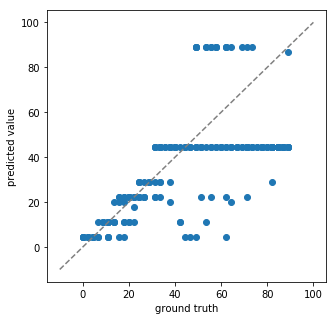

In [21]:
# check validation result
fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)

fig, axs = plt.subplots(1,nout,figsize=(5*nout,5))
for i in range(nout):
    ax = axs if nout == 1 else axs[i]
    
    ax.scatter(data[:,2*i], data[:,2*i+1])

    ax.set_xlabel("ground truth")
    ax.set_ylabel("predicted value")

    xx = np.linspace(norm_param[i,0],norm_param[i,1],10)
    ax.plot(xx,xx,ls="--",color="gray")
    
plt.savefig("figures/val.png")

Text(0, 0.5, 'a1ovGamma')

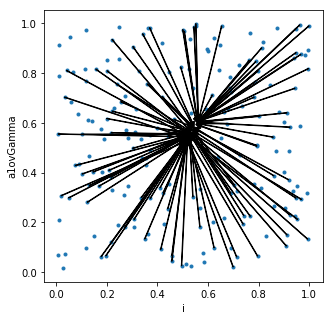

In [99]:
# check validation result
fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)

fig, ax = plt.subplots(1,1,figsize=(5,5))

data[:,0] /= 90
data[:,1] /= 90
ax.scatter(data[:,0], data[:,2], marker=".")

for i in range(100): #len(data)):
    ax.arrow(data[i,0], data[i,2], data[i,1]-data[i,0], data[i,3]-data[i,2], width=0.002,head_width=0.02,head_length=0.02,length_includes_head=True, color="k")

ax.set_xlabel("i")
ax.set_ylabel("a1ovGamma")

Text(0, 0.5, 'a1ovGamma')

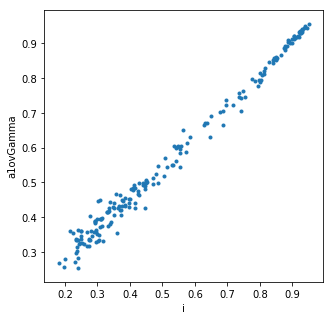

In [95]:
# check validation result
fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)

fig, ax = plt.subplots(1,1,figsize=(5,5))

data[:,0] /= 90
data[:,1] /= 90
ax.scatter(data[:,1], data[:,3], marker=".")

ax.set_xlabel("i")
ax.set_ylabel("a1ovGamma")

Text(0, 0.5, 'PDF')

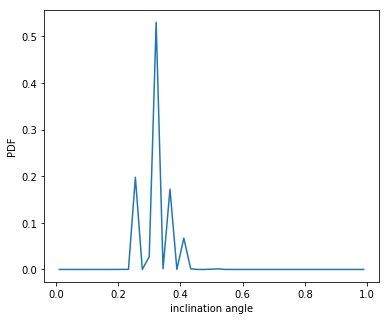

In [76]:
# check pdf distribution
fname = f"{output_dir}/val_dist0.txt"
data = np.loadtxt(fname)

fig = plt.figure(figsize=(6,5))
plt.plot(data[:,0],np.exp(data[:,1]))

plt.xlabel("inclination angle")
plt.ylabel("PDF")

In [16]:
# check validation data distribution
nbins = 20

fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)
print(len(data))
counts, bins = np.histogram(data[:,0], bins=nbins)
fig = plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("i [deg]")

data2 = np.sin( np.deg2rad( data[:,0] ))
counts, bins = np.histogram(data2, bins=nbins)
fig = plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("sin (i)")

OSError: ./output/ResNet_hd64_nl6_id2_r0.2_l1norm_bs32_ep2_lr0.001_ndata2000/val.txt not found.

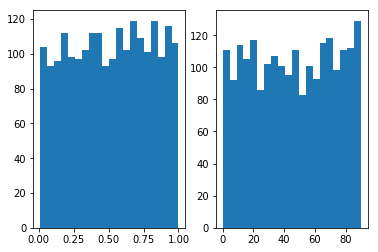

In [40]:
# check training data distribution
nbins = 20

fname = f"./training_data_2/Combinations.txt"
_data = np.loadtxt(fname, skiprows=5, usecols=[5,13])

fig, axs = plt.subplots(1,2)
for i in range(2):
    data = _data[:,i]
    ax = axs[i]
    
    counts, bins = np.histogram(data, bins=nbins)
    ax.hist(bins[:-1], bins, weights=counts)